In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [114]:
print(df.shape)
df.head()

(246, 14)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [115]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [116]:
df.iloc[:,:-1].describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,246,245,245,245,245,245,245,245,245,245,245,245,245
unique,33,5,2,20,63,19,40,174,167,199,107,175,128
top,01,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4
freq,8,62,244,29,10,43,133,8,5,5,8,5,12


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [118]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [119]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [120]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [121]:
df[df.isnull().any(axis=1)].reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [122]:
df.dropna(inplace=True,axis=0)

In [123]:
df.reset_index(drop=True, inplace=True)

In [124]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [125]:
df.reset_index(drop=True, inplace=True)

In [126]:
df.shape

(244, 15)

In [127]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [129]:
df.drop(index=122,axis=1,inplace=True)

In [130]:
df.reset_index(drop=True,inplace=True)

In [131]:
df.shape

(243, 15)

In [132]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [133]:
df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']] = df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']].astype(int)

In [134]:
df[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [136]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


<Axes: xlabel='month', ylabel='Temperature'>

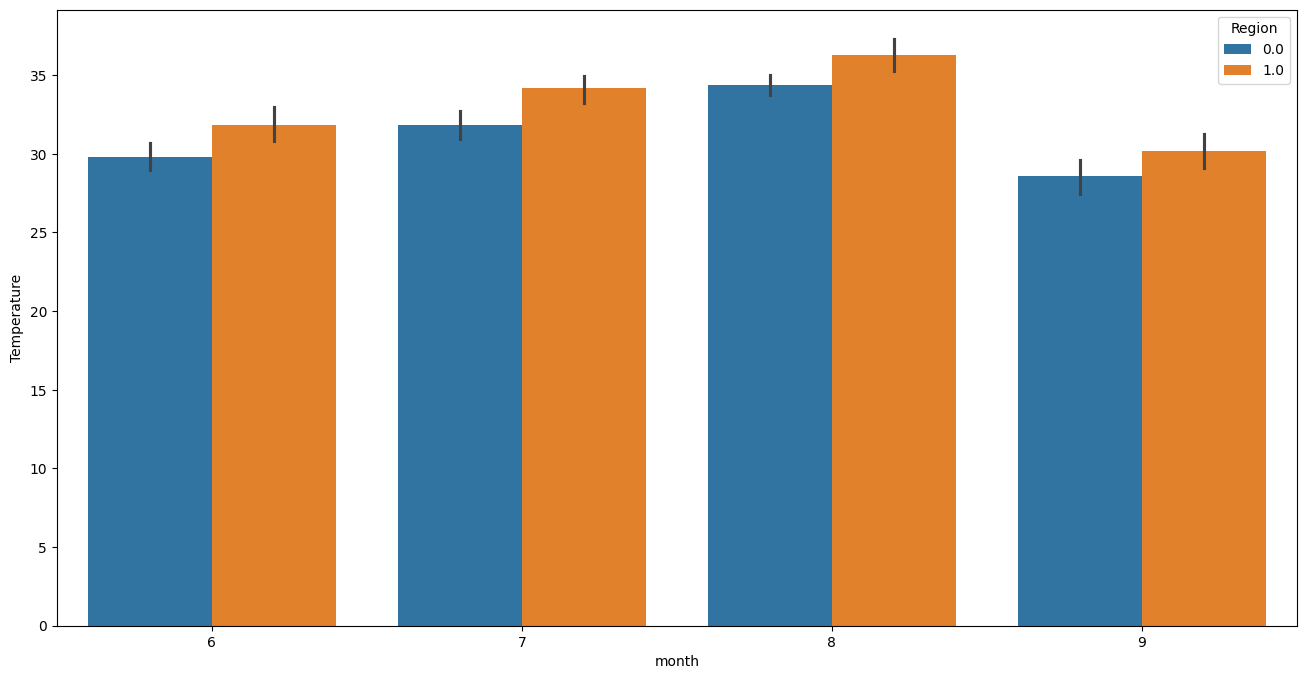

In [137]:
plt.figure(figsize=[16,8])
sns.barplot(x = df['month'],y=df['Temperature'],data=df,hue=df['Region'])

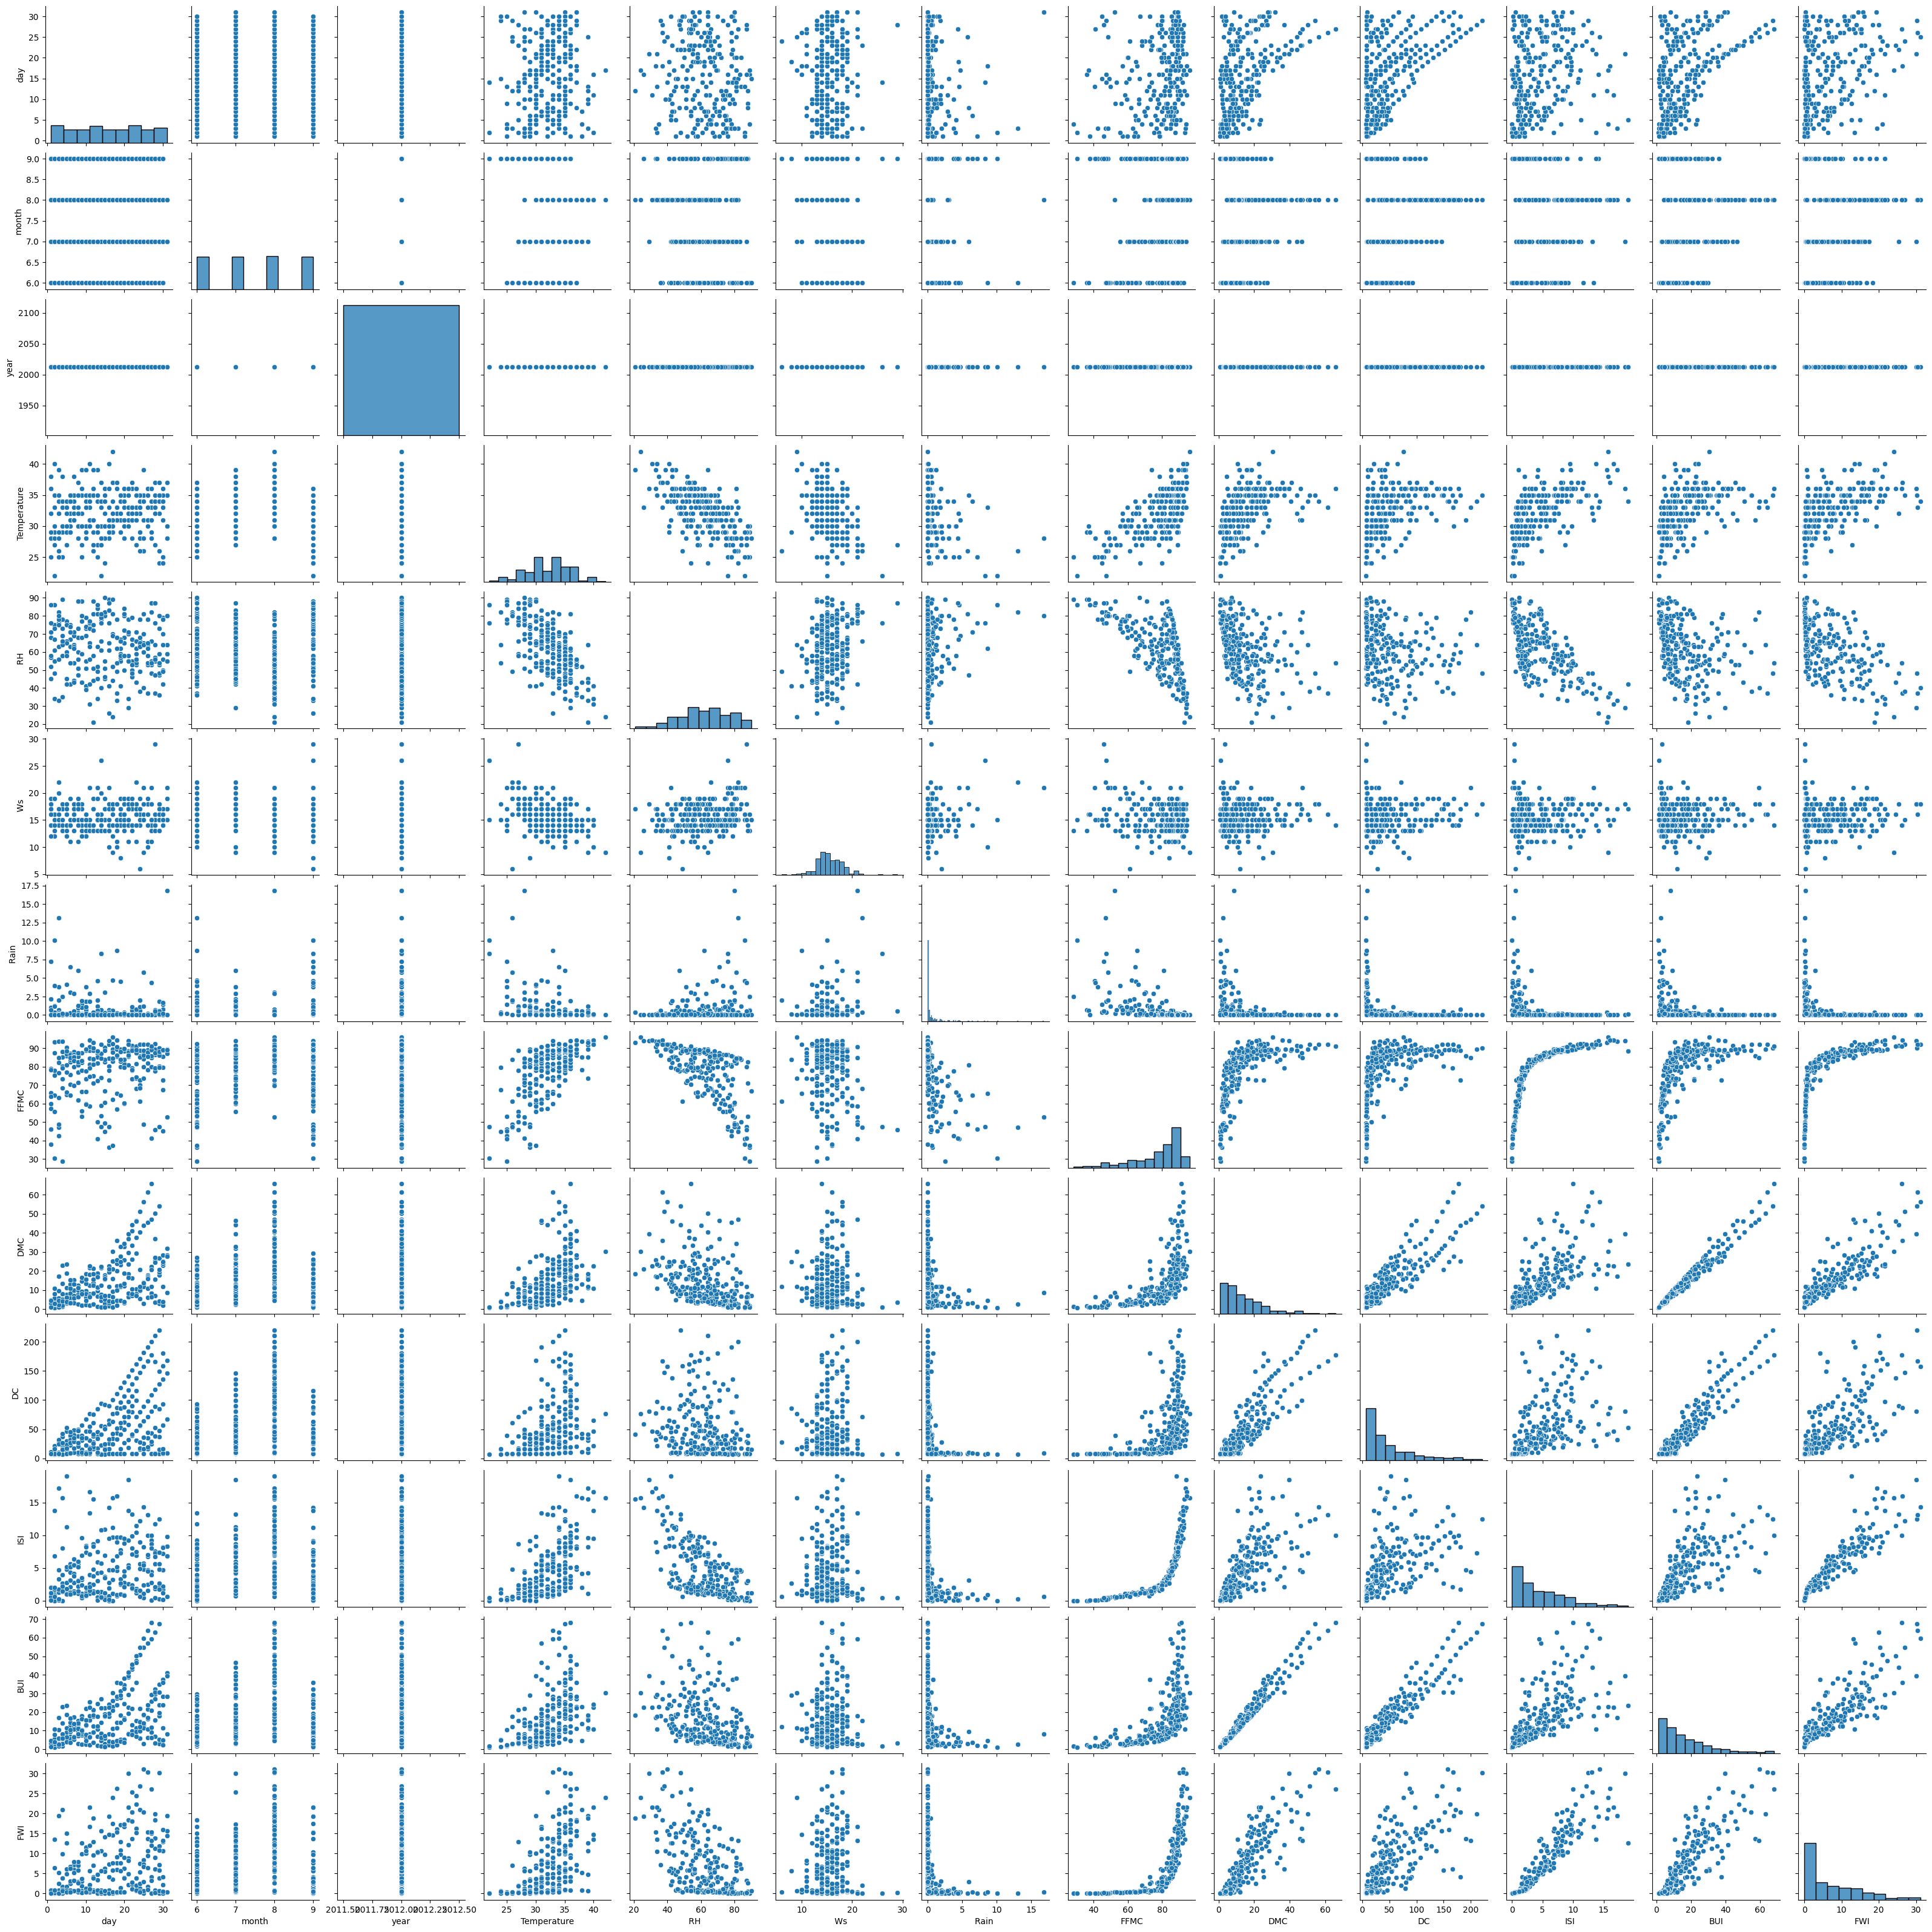

In [138]:
sns.pairplot(df.iloc[:,:-2])

In [139]:
corr_df = df.iloc[:,:-2].corr()

<Axes: >

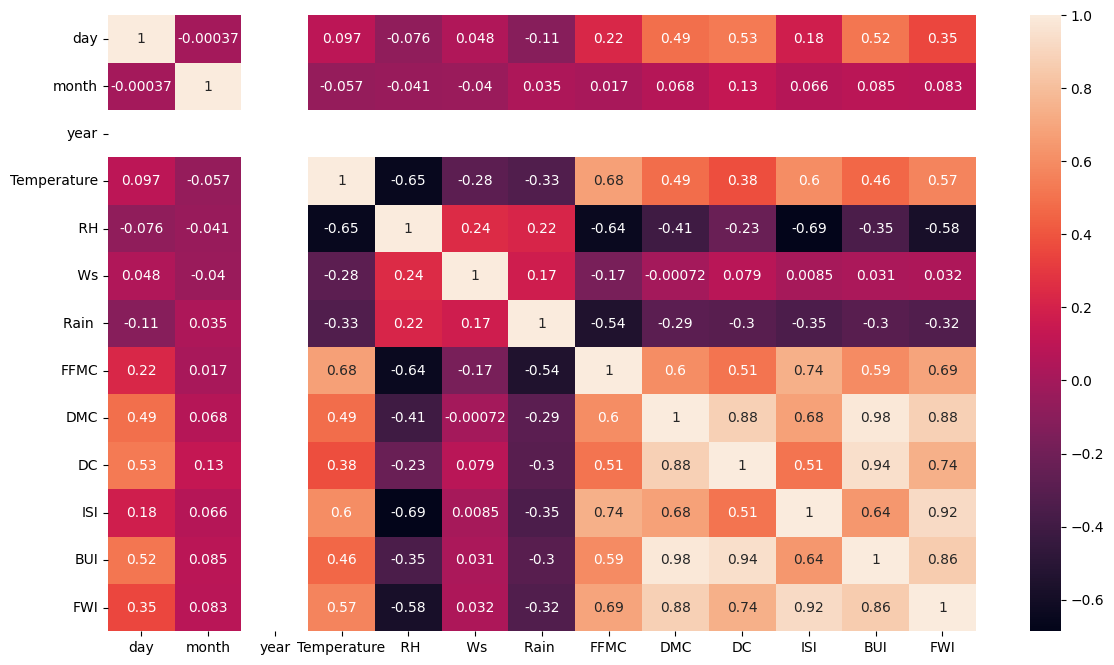

In [140]:
plt.figure(figsize=[14,8])
sns.heatmap(corr_df,annot=True)

In [141]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [142]:
df.columns = df.columns.str.replace(' ', '')

In [143]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [144]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


<Axes: xlabel='month', ylabel='Temperature'>

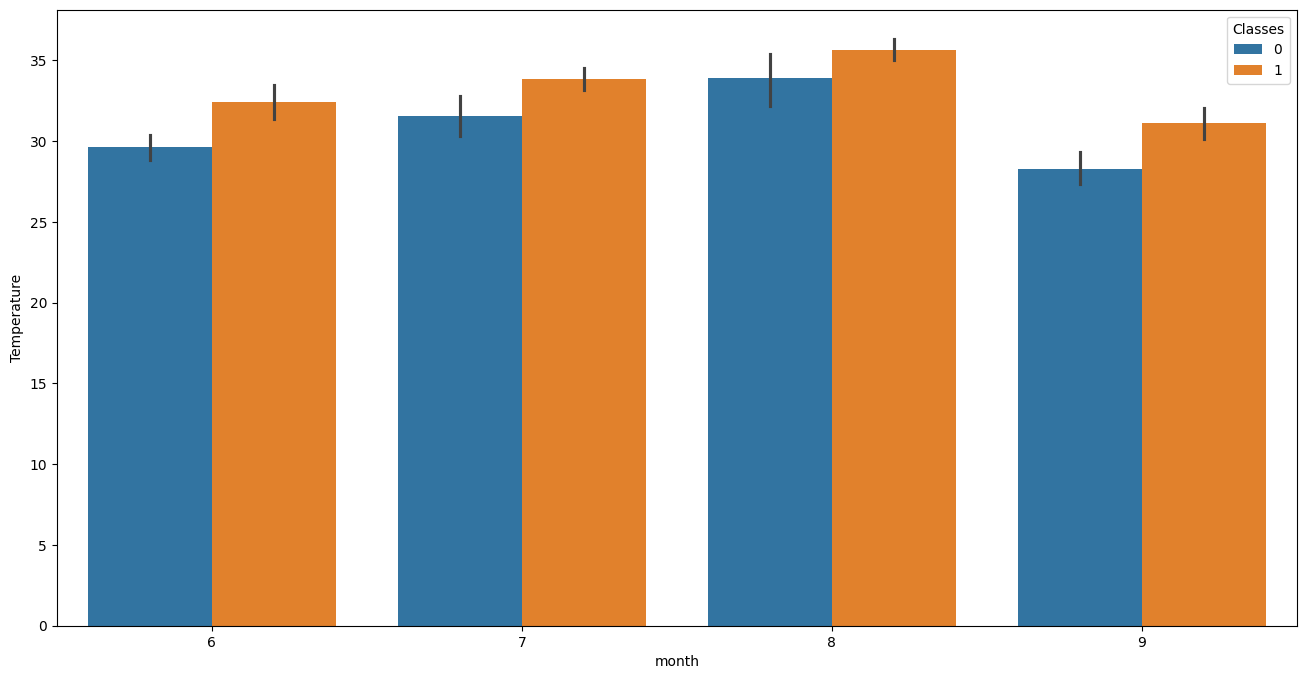

In [145]:
plt.figure(figsize=[16,8])
sns.barplot(x = df['month'],y=df['Temperature'],data=df,hue=df['Classes'])

In [146]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [147]:
df.drop(columns=['day', 'month', 'year'],inplace=True)

In [148]:
X = df.drop(columns='FWI')
y = df['FWI']

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [152]:
corrfeatures = correlation(X_train,0.85)

In [153]:
X_train.drop(corrfeatures,axis=1,inplace=True)
X_test.drop(corrfeatures,axis=1,inplace=True)

In [154]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [158]:
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)


In [159]:
X_test.shape

(49, 9)

In [160]:
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error


In [161]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

0.9805895859259883
0.5049978694165663
0.7670065260940514


In [162]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [163]:
ridge = Ridge()


In [164]:
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

0.9801058063273602
0.5192048325844728
0.7765060251246321


In [165]:
residual = y_test-y_pred


<Axes: ylabel='Density'>

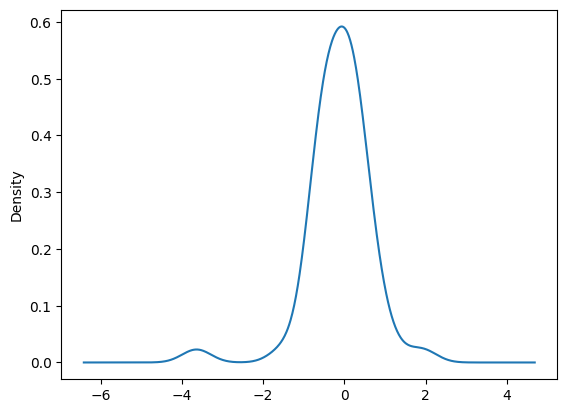

In [168]:
residual.plot(kind='kde')

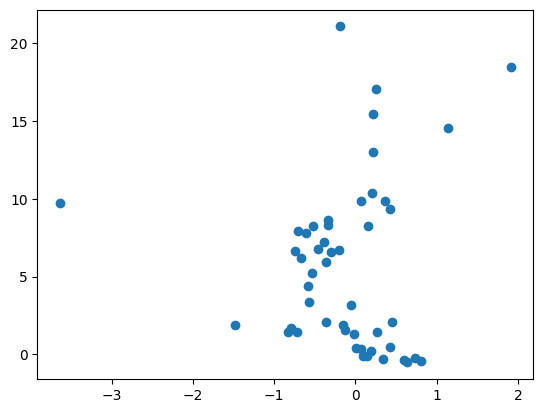

In [169]:
plt.scatter(residual,y_pred)

In [170]:
import pickle as pkl


In [171]:
ridge

Ridge()

In [172]:
with open('ridge_model.pkl', 'wb') as file:
    pkl.dump(ridge, file)


In [174]:
with open('scaler.pkl', 'wb') as file:
    pkl.dump(scaler, file)